import yfinance as yf # type: ignore
import pandas as pd

# Define the stock and market index
stock_tickers = ['HSBC.L', 'BP.L']
market_ticker = '^FTSE'  # FTSE 100

# Define the period
start_date = '2017-01-01'
end_date = '2020-01-01'

# Download data
stocks_data = {}
for ticker in stock_tickers:
    stocks_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

market_data = yf.download(market_ticker, start=start_date, end=end_date)

# Display the first few rows
for ticker, data in stocks_data.items():
    print(f"{ticker} data:\n", data.head())
print(market_data.head())


# References
https://en.wikipedia.org/wiki/Capital_asset_pricing_model

https://www.investopedia.com/terms/c/capm.asp

https://www.investopedia.com/terms/r/risk-freerate.asp

In [ ]:
# Calculate daily returns
for ticker in stock_tickers:
    stocks_data[ticker]['Return'] = stocks_data[ticker]['Adj Close'].pct_change()
market_data['Return'] = market_data['Adj Close'].pct_change()

# Merge the data on the date index
returns_data = market_data[['Return']].rename(columns={'Return': 'FTSE'}).copy()

for ticker in stock_tickers:
    returns_data[ticker] = stocks_data[ticker]['Return']

# Drop any rows with missing data
returns_data.dropna(inplace=True)

# Display the first few rows
print(returns_data.head())

Empty DataFrame
Columns: [FTSE, HSBC.L, BP.L]
Index: []


In [ ]:
import yfinance as yf

# Download S&P 500 historical data
sp500 = yf.Ticker("^GSPC")
# Define the period
start_date = '2017-01-01'
end_date = '2020-01-01'
aapl_data = aapl.history(start=start_date, end= end_date)

# Save to csv
aapl_data.to_csv("aapl_Historical_Data.csv")


In [ ]:
import yfinance as yf

# Download S&P 500 historical data
msft = yf.Ticker("MSFT")
# Define the period
start_date = '2017-01-01'
end_date = '2020-01-01'
msft_data = msft.history(start=start_date, end= end_date)

# Save to csv
msft_data.to_csv("MSFT_Historical_Data.csv")


In [ ]:
import yfinance as yf

# Download S&P 500 historical data
aapl = yf.Ticker("AAPL")
# Define the period
start_date = '2017-01-01'
end_date = '2020-01-01'
aapl_data = aapl.history(start=start_date, end= end_date)

# Save to csv
aapl_data.to_csv("AAPL_Historical_Data.csv")


In [ ]:
import yfinance as yf

# Download S&P 500 historical data
tsla = yf.Ticker("TSLA")
# Define the period
start_date = '2017-01-01'
end_date = '2020-01-01'
TSLA_data = tsla.history(start=start_date, end= end_date)

# Save to csv
TSLA_data.to_csv("TSLA_Historical_Data.csv")

# Code above this line is for setting up the files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
# Plotly.express module can plot interactive plots easily and effectively.

# it is important to note here that the Closing share prices are "Adjusted Close Prices"
AAPL = pd.read_csv("AAPL_Historical_Data.csv")
MSFT = pd.read_csv("MSFT_Historical_Data.csv")
TSLA = pd.read_csv("TSLA_Historical_Data.csv")
SP500 = pd.read_csv("SP500_Historical_Data.csv")

AAPL = AAPL[["Date", "Close"]]
MSFT = MSFT[["Date", "Close"]]
TSLA = TSLA[["Date", "Close"]]
SP500 = SP500[["Date", "Close"]]

AAPL.rename(columns={"Close": "AAPL"}, inplace = True)
MSFT.rename(columns={"Close": "MSFT"}, inplace = True)
TSLA.rename(columns={"Close": "TSLA"}, inplace = True)
SP500.rename(columns={"Close": "SP500"}, inplace = True)

In [2]:
# Convert the 'Date' column to datetime with timezone handling
#TSLA['Date'] = pd.to_datetime(TSLA['Date'], format="%Y-%m-%d")

TSLA['Date'] = pd.to_datetime(TSLA['Date'], format = "%Y-%m-%d",utc=True)

# Remove the time part from 'Date' and convert to datetime format
TSLA['Date'] = TSLA['Date'].dt.date

# Convert the 'Date' column to datetime format
TSLA['Date'] = pd.to_datetime(TSLA['Date'])

"""# Convert to naive datetime (remove timezone)
TSLA['Date'] = TSLA['Date'].dt.tz_localize(None)

# Extract only the date part
TSLA['Date'] = TSLA['Date'].dt.date

# Change the date format to dd-mm-yyyy
TSLA['Date'] = TSLA['Date'].dt.strftime("%Y-%m-%d")"""

'# Convert to naive datetime (remove timezone)\nTSLA[\'Date\'] = TSLA[\'Date\'].dt.tz_localize(None)\n\n# Extract only the date part\nTSLA[\'Date\'] = TSLA[\'Date\'].dt.date\n\n# Change the date format to dd-mm-yyyy\nTSLA[\'Date\'] = TSLA[\'Date\'].dt.strftime("%Y-%m-%d")'

In [3]:
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format = "%Y-%m-%d",utc=True)

# Remove the time part from 'Date' and convert to datetime format
MSFT['Date'] = MSFT['Date'].dt.date

# Convert the 'Date' column to datetime format
MSFT['Date'] = pd.to_datetime(MSFT['Date'])


"""# Convert the 'Date' column to datetime with timezone handling
MSFT['Date'] = pd.to_datetime(MSFT['Date'], utc=True)

# Convert to naive datetime (remove timezone)
MSFT['Date'] = MSFT['Date'].dt.tz_localize(None)

# Extract only the date part
MSFT['Date'] = MSFT['Date'].dt.date

# Change the date format to dd-mm-yyyy
MSFT['Date'] = MSFT['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))"""

"# Convert the 'Date' column to datetime with timezone handling\nMSFT['Date'] = pd.to_datetime(MSFT['Date'], utc=True)\n\n# Convert to naive datetime (remove timezone)\nMSFT['Date'] = MSFT['Date'].dt.tz_localize(None)\n\n# Extract only the date part\nMSFT['Date'] = MSFT['Date'].dt.date\n\n# Change the date format to dd-mm-yyyy\nMSFT['Date'] = MSFT['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))"

In [4]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'], format = "%Y-%m-%d",utc=True)

# Remove the time part from 'Date' and convert to datetime format
AAPL['Date'] = AAPL['Date'].dt.date

# Convert the 'Date' column to datetime format
AAPL['Date'] = pd.to_datetime(AAPL['Date'])


"""# Convert the 'Date' column to datetime with timezone handling
AAPL['Date'] = pd.to_datetime(AAPL['Date'], utc=True)

# Convert to naive datetime (remove timezone)
AAPL['Date'] = AAPL['Date'].dt.tz_localize(None)

# Extract only the date part
AAPL['Date'] = AAPL['Date'].dt.date

# Change the date format to dd-mm-yyyy
AAPL['Date'] = AAPL['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))"""

"# Convert the 'Date' column to datetime with timezone handling\nAAPL['Date'] = pd.to_datetime(AAPL['Date'], utc=True)\n\n# Convert to naive datetime (remove timezone)\nAAPL['Date'] = AAPL['Date'].dt.tz_localize(None)\n\n# Extract only the date part\nAAPL['Date'] = AAPL['Date'].dt.date\n\n# Change the date format to dd-mm-yyyy\nAAPL['Date'] = AAPL['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))"

In [5]:
SP500['Date'] = pd.to_datetime(SP500['Date'], format = "%Y-%m-%d",utc=True)

# Remove the time part from 'Date' and convert to datetime format
SP500['Date'] = SP500['Date'].dt.date

# Convert the 'Date' column to datetime format
SP500['Date'] = pd.to_datetime(SP500['Date'])

"""
# Convert the 'Date' column to datetime with timezone handling
SP500['Date'] = pd.to_datetime(SP500['Date'], utc=True)

# Convert to naive datetime (remove timezone)
SP500['Date'] = SP500['Date'].dt.tz_localize(None)

# Extract only the date part
SP500['Date'] = SP500['Date'].dt.date

# Change the date format to dd-mm-yyyy
SP500['Date'] = SP500['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
"""

"\n# Convert the 'Date' column to datetime with timezone handling\nSP500['Date'] = pd.to_datetime(SP500['Date'], utc=True)\n\n# Convert to naive datetime (remove timezone)\nSP500['Date'] = SP500['Date'].dt.tz_localize(None)\n\n# Extract only the date part\nSP500['Date'] = SP500['Date'].dt.date\n\n# Change the date format to dd-mm-yyyy\nSP500['Date'] = SP500['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))\n"

In [6]:
TSLA['Date'] = pd.to_datetime(TSLA['Date'])

In [7]:
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

In [8]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [9]:
SP500['Date'] = pd.to_datetime(SP500['Date'])

In [10]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    754 non-null    datetime64[ns]
 1   TSLA    754 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


In [11]:
TSLA.head()

,Date,TSLA
0,2017-01-03,14.466000
1,2017-01-04,15.132667
2,2017-01-05,15.116667
3,2017-01-06,15.267333
4,2017-01-09,15.418667


In [12]:
# concatenation of all dataframes into one.
stocks_df = pd.concat([AAPL, MSFT.drop(columns=["Date"]), TSLA.drop(columns=["Date"]), SP500.drop(columns=["Date"])], axis = 1)

# sort by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head(5)

,Date,AAPL,MSFT,TSLA,SP500
0,2017-01-03,26.952707,56.930565,14.466000,2257.830078
1,2017-01-04,26.922541,56.675846,15.132667,2270.750000
2,2017-01-05,27.059454,56.675846,15.116667,2269.000000
3,2017-01-06,27.361120,57.167103,15.267333,2276.979980
4,2017-01-09,27.611738,56.985157,15.418667,2268.899902


## Normalisation

In [13]:

def normalise_stocks(df):
    df_ = df.copy()
    for stock in df_.columns[1:]:
        df_[stock] = df_[stock] / df_.loc[0, stock]
    return df_

norm_stocks_df = normalise_stocks(stocks_df)
norm_stocks_df.head(5)

,Date,AAPL,MSFT,TSLA,SP500
0,2017-01-03,1.000000,1.000000,1.000000,1.000000
1,2017-01-04,0.998881,0.995526,1.046085,1.005722
2,2017-01-05,1.003961,0.995526,1.044979,1.004947
3,2017-01-06,1.015153,1.004155,1.055394,1.008482
4,2017-01-09,1.024451,1.000959,1.065856,1.004903


## Plot to visualise the normalised stocks

In [14]:
fig = px.line(title = "Normalized stock prices")
 
# Loop through each stock (while ignoring time columns with index 0)
for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df["Date"], y = norm_stocks_df[stock], name = stock)
fig.show()

## Here I should write some things I see by analysing the graph

#### --
#### --

## Code to do daily returns estimation

In [15]:
def daily_return_estimator(df):
    df_daily_return = df.copy()

# Loop through each stock (column of the dataframe except Date collumn)
    for i in df.columns[1:]:
 
        # Loop through each row/price belonging to the stock
        for j in range(1, len(df)):

            # Calculate the percentage of change from the previous day's close price. 
            # Simple equation of percentage change.
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
 
         # set the value of first row to zero (previous value is not available)
        df_daily_return.loc[0, i] = 0
 
    return df_daily_return

In [16]:
stocks_daily_return = daily_return_estimator(stocks_df)
stocks_daily_return.head(5)

,Date,AAPL,MSFT,TSLA,SP500
0,2017-01-03,0.000000,0.000000,0.000000,0.000000
1,2017-01-04,-0.111924,-0.447420,4.608510,0.572227
2,2017-01-05,0.508545,0.000000,-0.105730,-0.077067
3,2017-01-06,1.114828,0.866783,0.996690,0.351696
4,2017-01-09,0.915964,-0.318270,0.991226,-0.354859


Text(0.5, 1.0, 'Daily returns of the stocks')

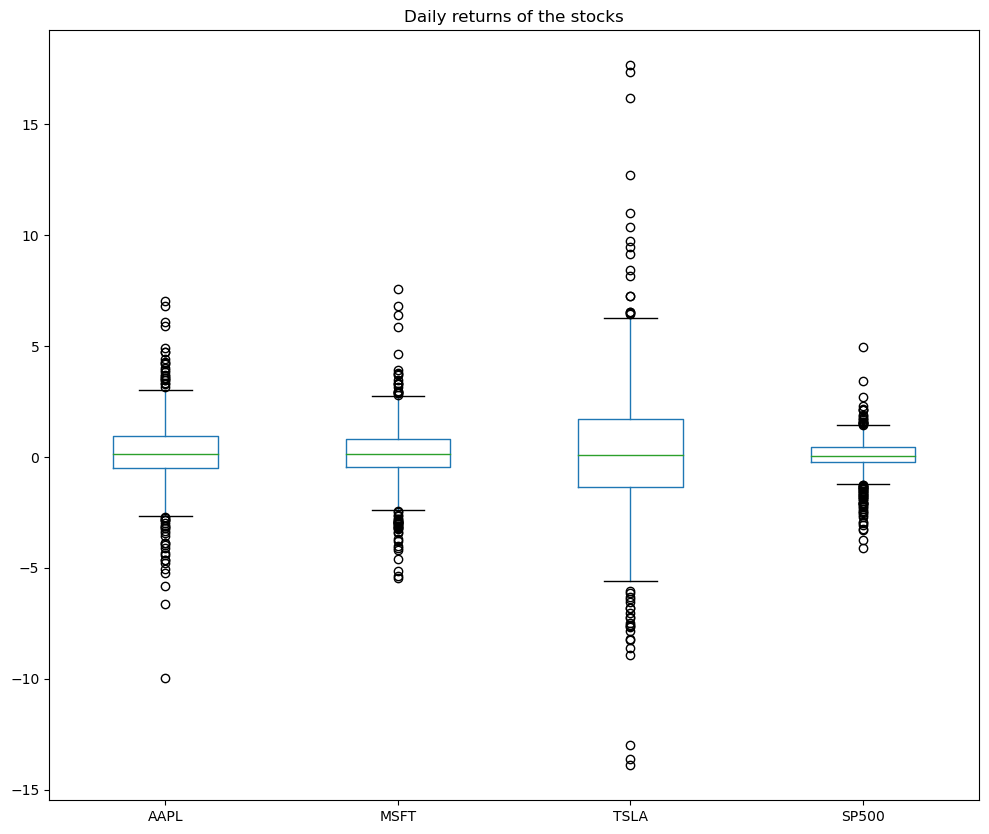

In [17]:
# Histogram of daily returns (in %)

stocks_daily_return.boxplot(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

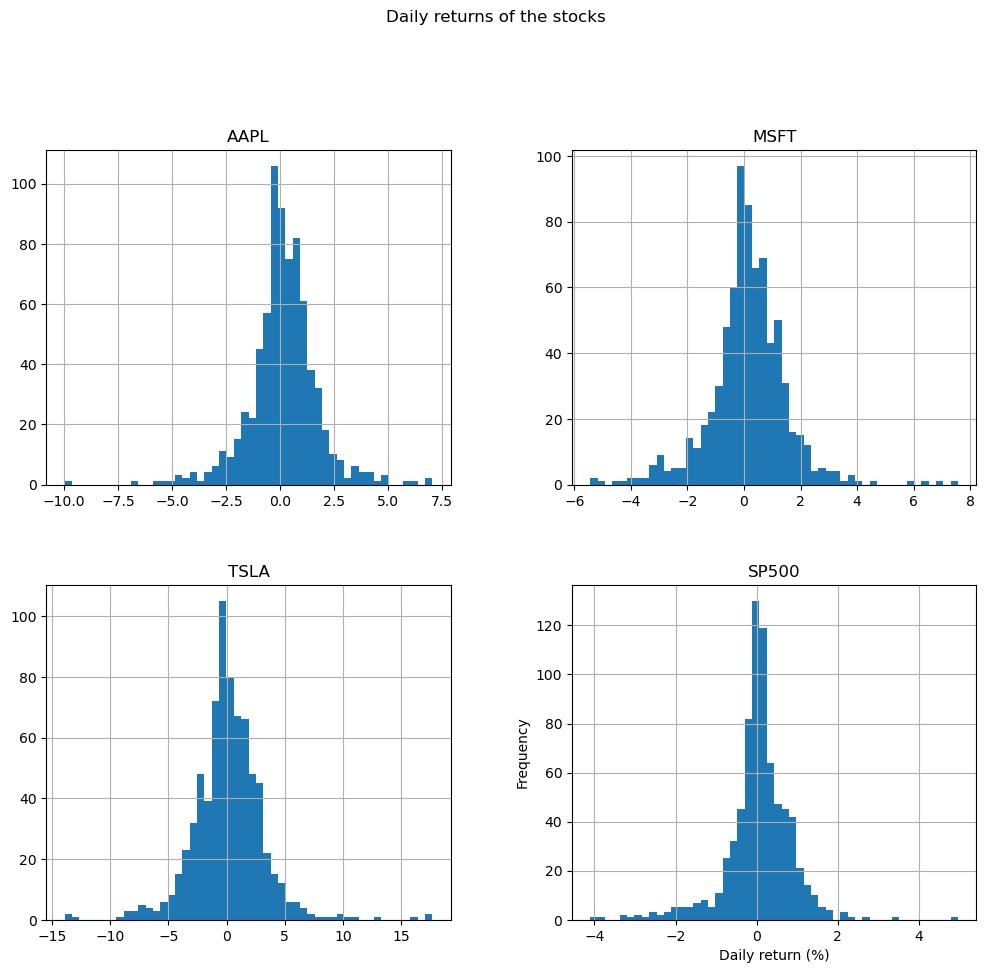

In [18]:
# Select only the numerical columns (excluding 'Date' if it's present)
numeric_columns = stocks_daily_return.select_dtypes(include=['float64', 'int64'])

# Create histogram of daily returns for numerical columns only
numeric_columns.hist(figsize=(12, 10), bins=50)
plt.suptitle("Daily returns of the stocks", y=1.02)
plt.xlabel("Daily return (%)")
plt.ylabel("Frequency")
plt.show()


#### The histograms above shows the stock returns are normally distributed.

#### Distribution Shape and Skewness:

#####    AAPL and MSFT: The distributions of daily returns for AAPL and MSFT are relatively symmetric around 0, suggesting that their daily returns are normally distributed. Both have slight negative skewness, meaning there are more extreme negative returns compared to positive returns.
#####    TSLA: The distribution of TSLA's daily returns is more spread out with a heavier tail on both sides, indicating higher volatility. It also appears to have a slight positive skew, suggesting that extreme positive returns are more frequent than extreme negative returns.
#####    SP500: The S&P 500 index has a distribution that is quite symmetric and tightly clustered around 0, suggesting lower volatility compared to individual stocks like TSLA.

#### Volatility:

#####    TSLA: Clearly the most volatile among the four, with returns spread out over a wider range. This is evidenced by the broader and flatter histogram.
#####    AAPL and MSFT: Both have moderate volatility, with returns clustered more closely around 0 compared to TSLA.
#####    SP500: The least volatile, with returns tightly clustered around 0, indicating that the index has a stabilizing effect when compared to individual stocks.

#### Frequency and Extremes:

#####    TSLA: Has frequent occurrences of higher returns (both positive and negative), indicating it experiences more dramatic daily price changes.
#####   AAPL and MSFT: Have fewer extreme returns compared to TSLA, indicating steadier performance.
#####    SP500: Has very few extreme returns, reflecting its nature as an index representing the market as a whole, which tends to be more stable.

#### Central Tendency:

#####    All four histograms show that the most frequent daily return is around 0%, meaning that on most days, these stocks and the index do not experience large gains or losses.
#####    TSLA: Despite its higher volatility, the central peak is also around 0%, but the frequency of days with extreme returns (both positive and negative) is higher than the others.

---
# Below is for Beta estimation which we can then use in CAPM

## This is for Time-Varying betas and estimation using rolling windows, particularly with an example of 60-day rolling window

In [19]:
stocks_daily_return.set_index('Date', inplace=True)

In [20]:
stocks_daily_return.head()

,AAPL,MSFT,TSLA,SP500
Date,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.111924,-0.447420,4.608510,0.572227
2017-01-05,0.508545,0.000000,-0.105730,-0.077067
2017-01-06,1.114828,0.866783,0.996690,0.351696
2017-01-09,0.915964,-0.318270,0.991226,-0.354859


--- 
### Code below is static beta calculation, same as the capm-model.ipynb file

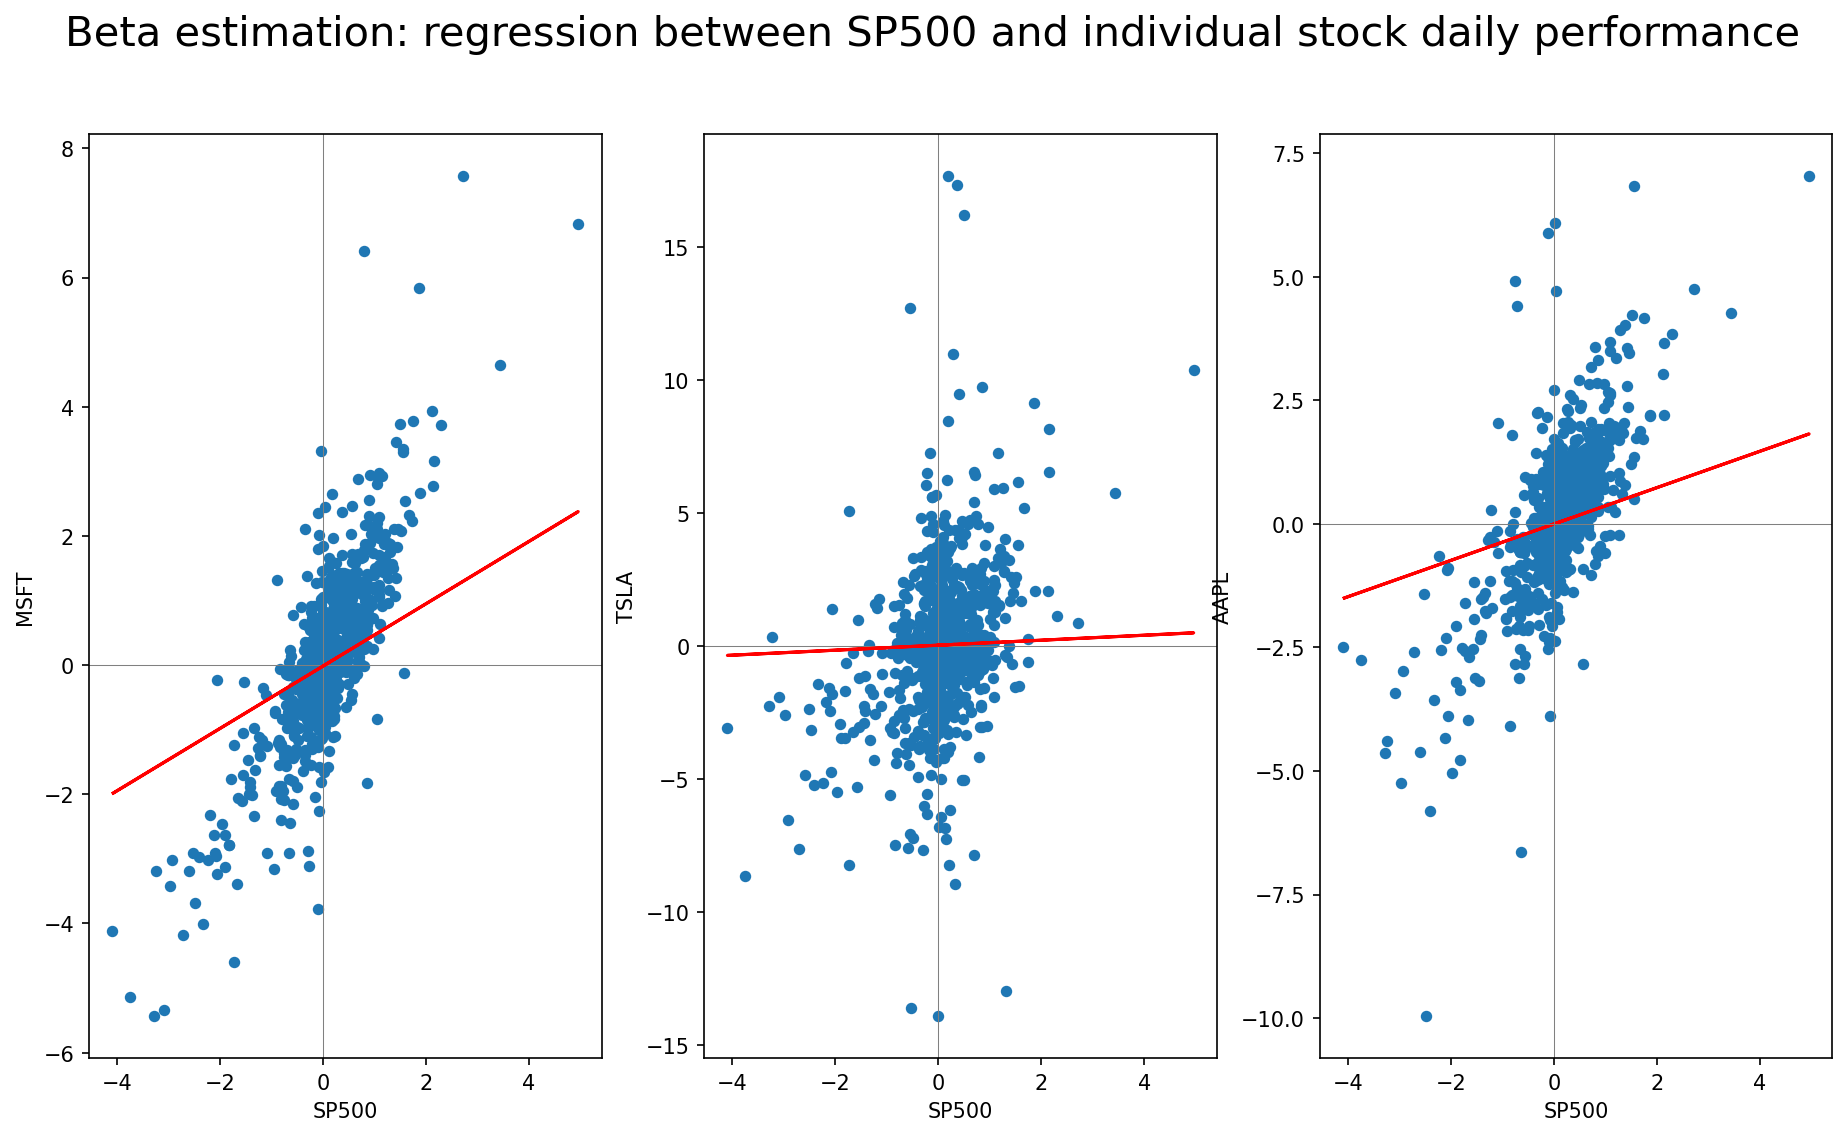

In [21]:
import statsmodels.formula.api as smf
# Initialize empty dictionaries to save results
beta,alpha = dict(), dict()

# Make a nice subplot
fig, axes = plt.subplots(1,3, dpi=150, figsize=(15,8))
axes = axes.flatten()

# Loop on every stock daily return
for idx, stock in enumerate(stocks_daily_return.columns):

# Ignoring the date and S&P500 Columns 
    if stock != "Date" and stock != "SP500":

        # scatter plot between stock and the S&P500
        stocks_daily_return.plot(kind = "scatter", x = "SP500", y = stock, ax=axes[idx-1])
 
        # Fit a line (regression using polyfit of degree 1)
        beta_fitted, alpha_fitted = np.polyfit(stocks_daily_return[stock], stocks_daily_return["SP500"], 1)
 
        regression_line = beta_fitted * stocks_daily_return["SP500"] + alpha_fitted
        axes[idx-1].plot(stocks_daily_return["SP500"], regression_line, "-", color = "r")
        
        # Add reference lines at x=0 and y=0 for easier alpha interpretation
        axes[idx].axhline(0, color='gray', linewidth=0.5)
        axes[idx].axvline(0, color='gray', linewidth=0.5)
        
        # save the regression coeeficient for the current stock
        beta[stock] = beta_fitted
        alpha[stock] = alpha_fitted

plt.suptitle("Beta estimation: regression between SP500 and individual stock daily performance", size=20)
plt.show()

#### Interpreting Alpha ('excess return' or 'abnormal rate of return'):

##### Alpha measures the stock's performance relative to the expected market return. It indicates whether the stock outperforms or underperforms the market on a risk-adjusted basis.

##### alpha >0: The stock has outperformed the market after accounting for its volatility.
##### alpha <0 : The stock has underperformed the market after accounting for its volatility.

----------------------------------------------------------------------------

In [22]:
print(beta)

{'AAPL': 0.367891828627128, 'MSFT': 0.4824392039970489, 'TSLA': 0.09369912578213152}


In [23]:
print(alpha)

{'AAPL': -0.001177626036432386, 'MSFT': -0.01632010231980876, 'TSLA': 0.038265400707470754}


--- 
# The CAPM calculations below are for Static beta

### CAPM Model

#### After estimating the beta and alpha, and also saving the values in the dictionary, now using the CAPM formula to apply it.

https://stockstotrade.com/how-many-trading-days-in-a-year/
#### according to the source above, we have approximately 252 trading days in a year for a US market which we can relate to Europe or Asia market also. So taking the average of 252 trading days in a year.

#### 
##### Using the formula of CAPM, first we have to estimate $E(R_m)$

In [ ]:
# expected return dictionary
ERi= dict()
Rf = 0 # assuming risk-free rate is zero in this case

# estimate the expected return of the market using the daily returns
ERm = stocks_daily_return["SP500"].mean() * 252

In [ ]:
ERm

12.798451399831858

In [ ]:
keys = list(beta.keys())
for k in keys:
    # Calculate return for every security using CAPM 
    ERi[k] = Rf + (beta[k] * (ERm - Rf))

for k in keys:
    print("Expected return based on CAPM model for {} is {}%".format(k, ERi[k]))

Expected return based on CAPM model for AAPL is 4.708445689079569%
Expected return based on CAPM model for MSFT is 6.174474705729798%
Expected return based on CAPM model for TSLA is 1.1992037075293425%


#### This would mean that if an investor intending to invest in AAPL (Apple), they should expect a 4.71% return in order to be compensated for the additional risk that they would be taking in this situation.

In [ ]:
# Real Return
for k in keys:
    print('Return based on historical data for {} is {}%'.format(k, stocks_daily_return[k].mean() * 252))

Return based on historical data for AAPL is 35.595281389860105%
Return based on historical data for MSFT is 35.05336432925356%
Return based on historical data for TSLA is 33.677693310464%


#### The Real return above showed how the stock actually performed based on the historical data, which actually shows that all 3 stocks overperformed by quite a margin.

---
## From here below, calculation is for time-varying beta using Rolling window

---
#### Code below is Function for rolling window betas

In [29]:
import statsmodels.api as sm

# Define the function to calculate rolling window betas
def calculate_rolling_betas(stock_returns, market_returns, window=60):
    betas = []
    for i in range(len(stock_returns) - window + 1):
        y = stock_returns[i:i+window]
        X = sm.add_constant(market_returns[i:i+window])
        model = sm.OLS(y, X).fit()
        betas.append(model.params[1])
    return pd.Series(betas, index=stock_returns.index[window-1:])

# Calculate rolling betas for each stock in the dataset
rolling_window = 60  # You can adjust this window size
rolling_betas = {}

for stock in stocks_daily_return.columns:
    if stock != "SP500":
        rolling_betas[stock] = calculate_rolling_betas(stocks_daily_return[stock], stocks_daily_return['SP500'], window=rolling_window)

# Convert to DataFrame for easier handling
rolling_betas_df = pd.DataFrame(rolling_betas)

# Drop initial NaN values from rolling betas
rolling_betas_df.dropna(inplace=True)

#output showing to see if NaN values are handled or not
rolling_betas_df


,AAPL,MSFT,TSLA
Date,,,
2017-03-29,0.928533,0.853267,1.101649
2017-03-30,0.911373,0.855023,1.088953
2017-03-31,0.966346,0.891921,0.904611
2017-04-03,0.972983,0.900691,0.737389
2017-04-04,0.958921,0.885678,0.727938
...,...,...,...
2019-12-24,1.287222,1.161416,0.096214
2019-12-26,1.420894,1.161057,0.152351
2019-12-27,1.402725,1.190949,-0.001780


In [30]:
# Define the function to calculate expected returns using time-varying betas
def calculate_expected_returns_tvb(rolling_betas_df, market_returns, risk_free_rate=0.01):
    expected_returns = rolling_betas_df.apply(lambda beta: risk_free_rate + beta * (market_returns - risk_free_rate))
    return expected_returns

# Calculate expected returns using time-varying betas
expected_returns_tvb = calculate_expected_returns_tvb(rolling_betas_df, stocks_daily_return['SP500'], risk_free_rate=0.01)

# Display the first few rows of the expected returns
expected_returns_tvb


,AAPL,MSFT,TSLA
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
...,...,...,...
2019-12-24,-0.028031,-0.024314,0.007157
2019-12-26,0.724449,0.593799,0.086604
2019-12-27,0.000740,0.002138,0.010012


In [31]:
# Drop NaN values resulting from the initial window period in expected_returns_tvb
expected_returns_tvb = expected_returns_tvb.dropna()

# Display the first few rows to ensure NaN values are handled
print(expected_returns_tvb.head())


                AAPL      MSFT      TSLA
Date                                    
2017-03-29  0.101491  0.094074  0.118548
2017-03-30  0.268384  0.252408  0.318730
2017-03-31 -0.217579 -0.200052 -0.203040
2017-04-03 -0.159506 -0.146912 -0.118462
2017-04-04  0.054065  0.050699  0.043450


In [32]:
# Calculate realized returns
realized_returns = stocks_daily_return.loc[expected_returns_tvb.index]

# Display the first few rows of realized returns
print(realized_returns.head())


                AAPL      MSFT      TSLA     SP500
Date                                              
2017-03-29  0.222540  0.275703 -0.025233  0.108532
2017-03-30 -0.131824  0.366568  0.194675  0.293511
2017-03-31 -0.187574  0.228290  0.136730 -0.225505
2017-04-03  0.027789 -0.470698  7.265539 -0.164213
2017-04-04  0.744652  0.274609  1.735236  0.055952


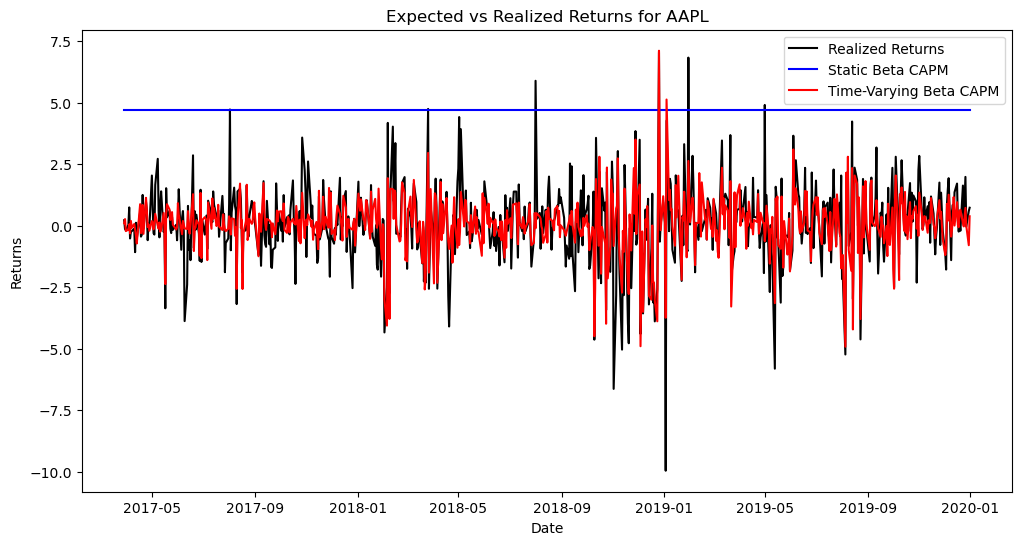

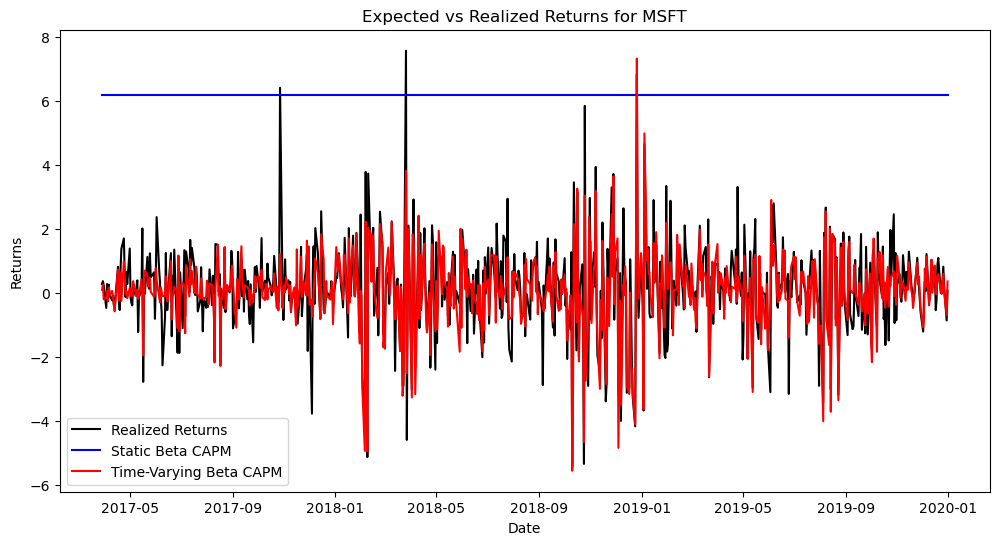

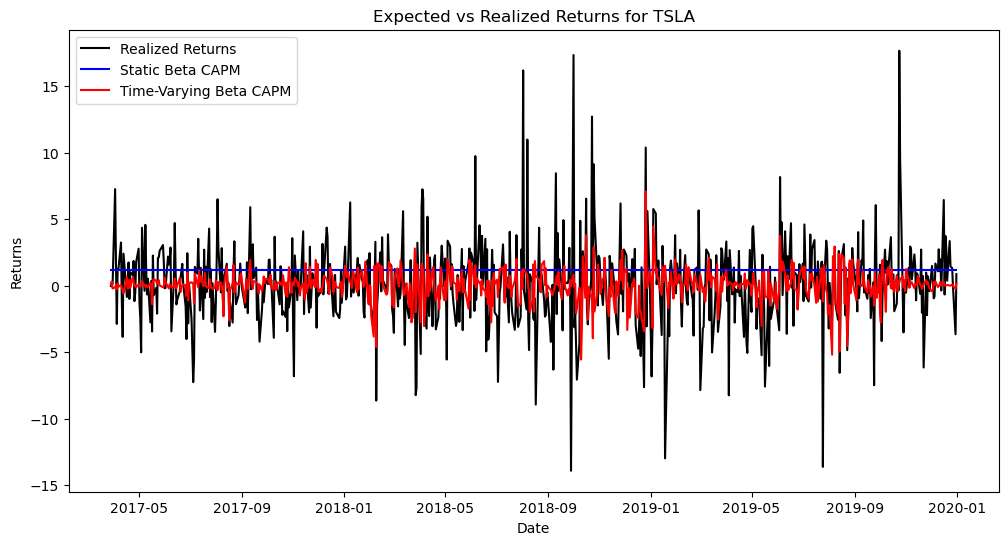

In [38]:
# Assuming you have the static CAPM expected returns calculated as 'ERi' previously
# Reconstructing the static expected returns for comparison
static_expected_returns = pd.DataFrame(index=expected_returns_tvb.index)

for stock in stocks_daily_return.columns:
    if stock != "SP500":
        static_expected_returns[stock] = ERi[stock]

# Plotting expected returns vs realized returns
import matplotlib.pyplot as plt

for stock in expected_returns_tvb.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(realized_returns.index, realized_returns[stock], label='Realized Returns', color='black')
    plt.plot(static_expected_returns.index, static_expected_returns[stock], label='Static Beta CAPM', color='blue')
    plt.plot(expected_returns_tvb.index, expected_returns_tvb[stock], label='Time-Varying Beta CAPM', color='red')
    plt.title(f'Expected vs Realized Returns for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()


# Note for Wentao Sir
-------------------------
## How would the portfolio thing work here as for example, taking 5 stocks and making a portfolio for it, then there would some weights assigned to every individual stock in order to signify their contribution/importance I assume. So how would that be calculated/assumed/estimated ?

#### Below code is to change working directory

In [ ]:

import os

# Specify the new directory path
new_directory = "/Users/yadav/ERP"  # Replace with your desired path

# Change the current working directory
os.chdir(new_directory)